In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.linear_model import LinearRegression as lregress
get_ipython().magic('matplotlib inline')

In [2]:
cf=rfr(n_estimators = 5, n_jobs=-1,verbose=1)


In [3]:
zspectra = pd.read_csv('fitted_cest.csv', header = None).values.squeeze()
diff = pd.read_csv('diff.csv', header = None).values.squeeze()
conc = pd.read_csv('conc.csv', header = None).values.squeeze()
pH = pd.read_csv('pH.csv', header = None).values.squeeze()
concs = pd.read_csv('concs.csv', header = None).values.squeeze()
pHs = pd.read_csv('pHs.csv', header = None).values.squeeze()

In [4]:
def mymetric(yexp, ypred):
    d = np.sum((yexp - ypred)**2 )
    d = d / ypred.shape[0]
    d = np.sqrt(d)
    d = d / np.mean(yexp)
    d = 100 * d
    return d

In [5]:
def mystddev(yexp,ypred):
    sy=np.std(ypred)
    d = np.sum(yexp - ypred) / np.sqrt(np.sum((yexp - ypred)**2 ))
    d = d / np.sqrt(ypred.shape[0])
    d = d / np.mean(yexp)
    d = 100 * d
    sd=np.sqrt(np.square(d)*np.square(sy))
    return sd

In [6]:
Y = pH
Ys = np.sort(pHs)

In [26]:
X = zspectra
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
cf.fit(X_train,y_train)
y_hat=cf.predict(X_test)
mymetric(y_test,y_hat)

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


3.2935613134099135

In [27]:
regressor = lregress(fit_intercept = False)
regressor.fit(X_train,y_train)
yhat = regressor.predict(X_test)
mymetric(y_test,yhat)

4.4509280220417242

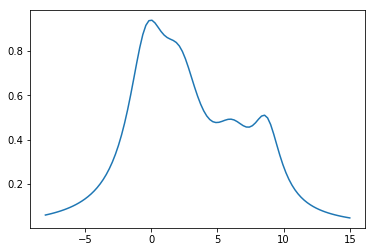

In [28]:
plt.plot(np.linspace(-8,15,101),X[1,:])

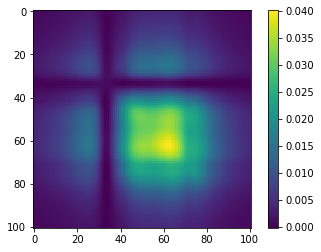

In [33]:
C = np.cov(X.T);
plt.imshow(C)
plt.colorbar()

In [41]:
import statsmodels.api as sm
mod=sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.296e+04
Date:                Mon, 05 Jun 2017   Prob (F-statistic):               0.00
Time:                        10:36:41   Log-Likelihood:                -1265.4
No. Observations:                6390   AIC:                             2733.
Df Residuals:                    6289   BIC:                             3416.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1         -3894.0393   2681.285     -1.452      0.1

In [40]:
spector_data = sm.datasets.spector.load()
spector_data.exog

array([[  2.66,  20.  ,   0.  ],
       [  2.89,  22.  ,   0.  ],
       [  3.28,  24.  ,   0.  ],
       [  2.92,  12.  ,   0.  ],
       [  4.  ,  21.  ,   0.  ],
       [  2.86,  17.  ,   0.  ],
       [  2.76,  17.  ,   0.  ],
       [  2.87,  21.  ,   0.  ],
       [  3.03,  25.  ,   0.  ],
       [  3.92,  29.  ,   0.  ],
       [  2.63,  20.  ,   0.  ],
       [  3.32,  23.  ,   0.  ],
       [  3.57,  23.  ,   0.  ],
       [  3.26,  25.  ,   0.  ],
       [  3.53,  26.  ,   0.  ],
       [  2.74,  19.  ,   0.  ],
       [  2.75,  25.  ,   0.  ],
       [  2.83,  19.  ,   0.  ],
       [  3.12,  23.  ,   1.  ],
       [  3.16,  25.  ,   1.  ],
       [  2.06,  22.  ,   1.  ],
       [  3.62,  28.  ,   1.  ],
       [  2.89,  14.  ,   1.  ],
       [  3.51,  26.  ,   1.  ],
       [  3.54,  24.  ,   1.  ],
       [  2.83,  27.  ,   1.  ],
       [  3.39,  17.  ,   1.  ],
       [  2.67,  24.  ,   1.  ],
       [  3.65,  21.  ,   1.  ],
       [  4.  ,  23.  ,   1.  ],
       [  

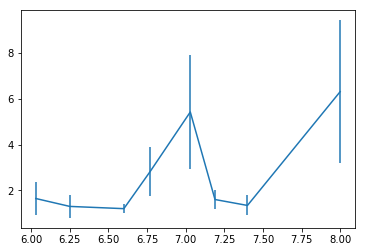

In [8]:
Error_dum = np.zeros(Ys.shape)
Error_std = np.zeros(Ys.shape)
for idk,K in enumerate(np.arange(0,Ys.shape[0])):
    Error_dum[K] = mymetric(y_test[np.where(y_test==(np.ones(y_test.shape)*Ys[K]))], y_hat[np.where(y_test==(np.ones(y_test.shape)*Ys[K]))])
    Error_std[K] = mystddev(y_test[np.where(y_test==(np.ones(y_test.shape)*Ys[K]))], y_hat[np.where(y_test==(np.ones(y_test.shape)*Ys[K]))])
    
plt.errorbar(Ys,Error_dum, yerr = Error_std);

(-8, 15)

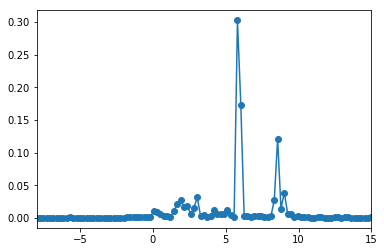

In [9]:
imp=cf.feature_importances_
offset=np.linspace(-8,15,101)
plt.plot(offset,cf.feature_importances_,'-o');
plt.xlim((-8,15))

In [10]:
cf.fit(X_train[:, imp>0.01],y_train)
y_hat=cf.predict(X_test[:, imp>0.01])
mymetric(y_test,y_hat)

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


3.2306705933707964

In [11]:
plt.errorbar?